# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['ccbar0','ccbar0']
filenames1 = ['ccbar_new00','bbbar_new00','electron_hits0','positron_hits0']#,'ccbar_new00'
filenames1 = ['ccbar_hits0','bbbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 1#25000*50/500

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float32')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
    data.head()
    
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] > -25) ]
    
    data.loc[data['sdphi2'] < -9, 'IsTrue3'] = 1
    data.loc[data['sdphi3'] < -9, 'IsTrue3'] = 1
    data['IsTrue0'] = data['IsTrue0']*data['IsTrue1'] * data['IsTrue2']*data['IsTrue3']
    data.loc[data['IsTrue0'] > 0, 'IsTrue0'] = 1


    data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    data['Ecore'] = (data['Ecore']*data['The0']-data['reconpt']) / data['Ecore'] / data['The0']# to be fixed
    data['reconpt'] = (data['Pt']-data['reconpt'])/data['Pt']
    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = data['Ecore']*data['The0']
    #data['Ecore1'] = data['Ecore']-data['reconpt']
    #data['Ecore2'] = data['Ecore1']/data['Ecore']
    #data['Ecore3'] = data['Ecore2']/data['Ecore']
    #data['reconpt1'] = data['Pt']-data['reconpt']
    #data['reconpt2'] = data['reconpt1']/data['Pt']
    #data['reconpt3'] = data['reconpt2']/data['Pt']
    #data['Alpha'] = data['Alpha']*data['Pt']
    #data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']
    #data['sdphi2'] = data['sdphi2'] + 10
    #data['sdphi3'] = data['sdphi3'] + 10
    #data.loc[(data['sdthe3'] > -9) & (data['sdthe2'] > -9), 'sdthe3'] = 1
    #data.loc[data['sdthe3'] != 1, 'sdthe3'] = 0

In [4]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
1388041        3  0.405747  2.853593  1.032213  2.330078  54.306553  0.264404   
2529168        1  0.723687 -0.780532  1.024746 -0.484375  48.456440 -0.149536   
1558652        1  0.444403  0.106727  1.032994 -0.375977 -54.951672  0.245361   
2097406        3  2.551215  2.538790  1.019479  2.457031  43.767601  0.040558   
348071         3  0.432523 -0.217369  1.033783  0.290771 -54.546249 -0.255615   

            Ecore  Centrality  Charge  ...     sdthe3  IsTrue3  \
1388041 -0.429146          18      -1  ... -10.000000        1   
2529168 -0.042591          61       1  ... -10.000000        1   
1558652 -0.493595          87      -1  ... -10.000000        1   
2097406  0.195393          66      -1  ... -10.000000        1   
348071  -0.088276          90       1  ...  -0.213981        1   

         SecondHitPhiR3  SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  \
1388041           -99.0      -99.000000           -99.0      -99.000000   
2529168           -99.0      -99.000000           -99.0      -99.000000   
1558652           -99.0      -99.000000           -99.0      -99.000000   
2097406           -99.0       29.136255           -99.0        9.224707   
348071            -99.0      -99.000000           -99.0      -99.000000   

         SecondHitPhiR31  SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31  
1388041            -99.0            -99.0            -99.0            -99.0  
2529168            -99.0            -99.0            -99.0            -99.0  
1558652            -99.0            -99.0            -99.0            -99.0  
2097406            -99.0            -99.0            -99.0            -99.0  
348071             -99.0            -99.0            -99.0            -99.0  

[5 rows x 64 columns]

In [5]:
print(data.size, data.shape)

790327552 (12348868, 64)


In [6]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns=  ['SecondHitPhiL0','SecondHitTheL0','SecondHitPhiL01','SecondHitTheL01'])
data = data.drop(columns=  ['SecondHitPhiL1','SecondHitTheL1','SecondHitPhiL11','SecondHitTheL11'])
data = data.drop(columns=  ['SecondHitPhiL2','SecondHitTheL2','SecondHitPhiL21','SecondHitTheL21'])
data = data.drop(columns=  ['SecondHitPhiL3','SecondHitTheL3','SecondHitPhiL31','SecondHitTheL31'])
data = data.drop(columns=  ['NBDThit','reconphi0','Alpha','Charge', 'Arm'])

#data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
#data = data.drop(columns = ['sdthe0','sdthe1','sdthe2'])

data = data.drop(columns=  ['SecondHitPhiR0','SecondHitTheR0','SecondHitPhiR01','SecondHitTheR01'])
data = data.drop(columns=  ['SecondHitPhiR1','SecondHitTheR1','SecondHitPhiR11','SecondHitTheR11'])
data = data.drop(columns=  ['SecondHitPhiR2','SecondHitTheR2','SecondHitPhiR21','SecondHitTheR21'])
data = data.drop(columns=  ['SecondHitPhiR3','SecondHitTheR3','SecondHitPhiR31','SecondHitTheR31'])

In [7]:
data.head()

Pt     Ecore  Centrality   reconpt    sdphi0    sdthe0  \
1388041  0.405747 -0.429146          18 -0.497808 -0.644083 -0.293064   
2529168  0.723687 -0.042591          61 -0.065793 -0.317525 -1.290318   
1558652  0.444403 -0.493595          87 -0.540716  0.405071  0.977663   
2097406  2.551215  0.195393          66  0.117178  0.100213 -0.809409   
348071   0.432523 -0.088276          90  0.028523  0.247126 -1.243775   

         IsTrue0    sdphi1    sdthe1    sdphi2    sdthe2     sdphi3     sdthe3  
1388041        0 -2.765483  0.783359  0.391703 -0.332150 -10.000000 -10.000000  
2529168        1 -0.207452  1.676258 -0.626651 -0.350482 -10.000000 -10.000000  
1558652        1 -1.326531 -0.674639  0.698374  1.577360 -10.000000 -10.000000  
2097406        1  0.481586 -0.096959  1.627080 -0.411820 -10.000000 -10.000000  
348071         1  0.380879  0.428719 -0.931514 -0.073278   0.510605  -0.213981

In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'reconpt', 'Ecore1', 'Ecore2', 'Ecore3', 'reconpt1', 'reconpt2', 'reconpt3']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


In [9]:
#analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/2)
    cut_off_test = int (data.shape[0]/4*3 + 1)

    print(cut_off_val,cut_off_test)
    all_test = data[cut_off_test:]
    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test, all_test

In [11]:
X_train_all, X_test, y_train_all, y_test, all_test = feature_engineering(data)

6174434 9261652


In [12]:
X_test

Pt     Ecore  Centrality   reconpt    sdthe0    sdthe1  \
4071051  0.831189  0.098368          10 -0.007716 -0.683324  1.040150   
3477654  0.470931 -0.253515          18 -0.094947  0.753132  0.349164   
267868   0.460374 -0.027647          57 -0.167834  0.103175  1.033302   
3389098  0.703037 -0.102461          31 -0.050798 -1.258079 -1.126016   
3517770  0.571325 -0.316164          63 -0.422701 -0.445658  3.620546   
...           ...       ...         ...       ...       ...       ...   
493592   0.808530 -0.290908          69 -0.164509 -1.140657 -0.713810   
850556   0.593466 -0.126098          27 -0.071880 -0.373234  0.022191   
1794160  0.521929 -0.021334          87  0.072661  1.189299  1.075940   
6333293  0.405278 -0.528849           7 -0.321280 -0.839149 -2.213481   
2109563  0.401566 -0.091438          84 -0.047811 -0.136579 -0.007627   

            sdthe2     sdthe3  
4071051 -10.000000   1.010816  
3477654   0.182229   0.445367  
267868    0.171090  -0.060347  
3389098   0.778673   0.008656  
3517770  -2.451067 -10.000000  
...            ...        ...  
493592   -0.451589 -10.000000  
850556  -10.000000   0.639546  
1794160  -0.468938   1.522823  
6333293   3.658445  -0.859565  
2109563 -10.000000   0.003409  

[3087216 rows x 8 columns]

In [13]:
X_train = X_train_all
y_train = y_train_all
w_train = y_train-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.00      0.00     99495
           1       0.97      1.00      0.98   2987721

    accuracy                           0.97   3087216
   macro avg       0.94      0.50      0.49   3087216
weighted avg       0.97      0.97      0.95   3087216

confusion matrix
[[    206   99289]
 [     20 2987701]]


In [15]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.001],
    "max_depth":[12],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[12]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.9693869816689211
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}
0.9692182344866181
time of execution (sec) 628.1526365280151


# Cross Validation

In [16]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.54      0.32      0.40     99495
           1       0.98      0.99      0.98   2987721

    accuracy                           0.97   3087216
   macro avg       0.76      0.65      0.69   3087216
weighted avg       0.96      0.97      0.97   3087216



In [17]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.16794870889336577
roc auc: 0.912505145277967
f1 score: 0.9078264605216914


Text(0.5, 1.0, 'ROC AUC Curve')

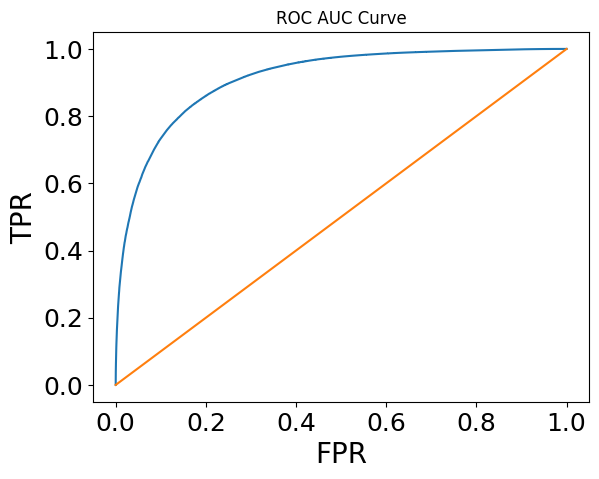

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
filenames1 = ['ccbar_hits0','bbbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [19]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.14240382099362553


In [142]:
i = 160000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.785 0.1676
0.9136889044824362 0.13157445097743606 0.7851917899964554


In [143]:
print(sum(predicted),len(predicted))

3029038 3087216


In [144]:
kek_data = all_test
kek_data = kek_data.drop(columns = ['IsTrue0'])
kek_data = kek_data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.9195413172540279


In [145]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [146]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = all_test.reset_index()  # make sure indexes pair with number of rows

sigma = 3

counter =-1
centrality_prev, pt_prev, IsTrue0_prev = 0, 0, 0
centrality, pt, IsTrue0 = 0, 0, 0
prob, prob_prev = 0, 0
isTrue_sd, isTrue_sd_prev = 0, 0
puk_loc, puk_prev = 0, 0
for index, row in data0.iterrows():
    counter+=1
    if counter>400000: break
    sdphi0, sdphi1, sdphi2, sdphi3 = row['sdphi0'], row['sdphi1'], row['sdphi2'], row['sdphi3'] 
    sdthe0, sdthe1, sdthe2, sdthe3 = row['sdthe0'], row['sdthe1'], row['sdthe2'], row['sdthe3'] 
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']

    if ptloc<0.4 or centralityloc<0: continue

    if abs(ptloc -  pt_prev) < 1e-6: 
        cont = 0
        puk_prev = 1
        if proba_loc[counter][1] > prob_prev:
            prob_prev = proba_loc[counter][1]
            IsTrue0_prev = IsTrue0loc
        isTrue_sd_prev = IsTrue0loc
    else: 
        isTrue_sd = isTrue_sd_prev
        isTrue_sd_prev = IsTrue0loc
        pt = pt_prev
        pt_prev = ptloc
        centrality = centrality_prev
        centrality_prev = centralityloc
        prob = prob_prev
        prob_prev = proba_loc[counter][1]
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        cont = 1
        puk = puk_prev
        puk_prev = 0

    if not cont: continue

    if True: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if ( abs(sdphi0) < sigma and abs(sdthe0) < sigma and abs(sdphi1) < sigma and abs(sdthe1) < sigma ) and ( ( abs(sdphi2) < sigma and abs(sdthe2) < sigma ) or ( abs(sdphi3) < sigma and abs(sdthe3) < sigma ) ):
        if isTrue_sd: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)
    if prob>thresholds[i]: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [147]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

387167.1 25668.1 0.891 0.885 0.785 0.127 0.162 0.168


In [148]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

6.138 0.881 0.144 185


In [149]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [150]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(8)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(4)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(2)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(8)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(4)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(2)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    proj.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))
c1.SaveAs("output/kek.png")

0.0 2628.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file output/kek.png has been created


In [151]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [152]:
import pickle
with open('output/bdt_hit.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


In [153]:
import pickle
# load
with open('output/bdt_hit.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


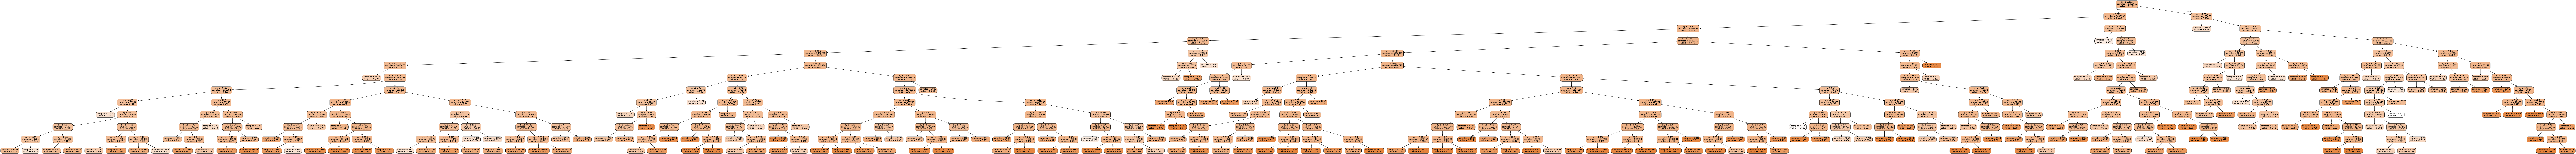

In [154]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [155]:
clf2.predict(kek_data[0:100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [156]:
clf2.predict_proba(kek_data[0:100])

array([[0.08045868, 0.91954132],
       [0.12976514, 0.87023486],
       [0.06403138, 0.93596862],
       [0.07880147, 0.92119853],
       [0.10276534, 0.89723466],
       [0.49886607, 0.50113393],
       [0.0627828 , 0.9372172 ],
       [0.43238073, 0.56761927],
       [0.04856681, 0.95143319],
       [0.04804028, 0.95195972],
       [0.05337451, 0.94662549],
       [0.10098688, 0.89901312],
       [0.06513757, 0.93486243],
       [0.04646273, 0.95353727],
       [0.06900667, 0.93099333],
       [0.06956082, 0.93043918],
       [0.04621598, 0.95378402],
       [0.10714573, 0.89285427],
       [0.12164633, 0.87835367],
       [0.06991259, 0.93008741],
       [0.05159671, 0.94840329],
       [0.55926994, 0.44073006],
       [0.04966028, 0.95033972],
       [0.04793014, 0.95206986],
       [0.14127546, 0.85872454],
       [0.04607406, 0.95392594],
       [0.05470685, 0.94529315],
       [0.09882623, 0.90117377],
       [0.09747569, 0.90252431],
       [0.06244516, 0.93755484],
       [0.

In [157]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}


In [158]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.04804028, 0.95195972],
       [0.05337451, 0.94662549],
       [0.10098688, 0.89901312],
       [0.06513757, 0.93486243],
       [0.04646273, 0.95353727],
       [0.06900667, 0.93099333],
       [0.06956082, 0.93043918],
       [0.04621598, 0.95378402],
       [0.10714573, 0.89285427],
       [0.12164633, 0.87835367],
       [0.06991259, 0.93008741]])

In [159]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,1):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[0.39574487 0.3869919  0.34122853 0.36542653 0.39064407 0.37250398
 0.36208943 0.39574487 0.34122853 0.34179395]
[3.05507882 3.05507882 2.90043829 2.66540525 2.82512459 2.90043829
 2.66540525 2.96602079 2.67150531 2.42477163 2.90043829]
[0.59766489 0.59555835 0.58448892 0.59035341 0.59643774 0.59206389
 0.58954613 0.59766489 0.58448892 0.58462623]


In [160]:
best_gbc = clf2.best_estimator_

In [161]:
n_estim = best_gbc.n_estimators

In [162]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[2.98648292 2.87557026 2.18630699 2.66389786 3.02152801 2.60204893
 2.5934553  3.02711159 2.12023349 1.97693145]
[0.95195972 0.94662549 0.89901312 0.93486243 0.95353727 0.93099333
 0.93043918 0.95378402 0.89285427 0.87835367]
0.2


In [163]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [164]:
print(log_odds_predictions)

[[1.9787243373849146, 1.9349594980034226, 1.706142653566339, 1.8271326529541951, 1.953220338983051, 1.8625198880462681, 1.8104471657741081, 1.9787243373849146, 1.706142653566339, 1.7089697306303804], [1.6644842872967722, 1.6523513370166307, 1.4836641010563034, 1.5750499127783426, 1.6644842872967722, 1.528452225308331, 1.5865326778035216, 1.6451030456665428, 1.4836641010563034, 1.2439329028228276], [1.465844403010609, 1.4404818414417964, 1.2308468272875865, 1.2961547273576257, 1.4781108520079547, 1.3450773982781874, 1.2961547273576257, 1.4591302179804344, 1.2646700124925148, 1.2232726134858274], [1.3362292654344217, 1.2708584866917978, 1.1934321074783456, 1.2923418170456373, 1.3538302877146822, 1.1563291328212713, 1.2923418170456373, 1.332497235745191, 1.1024341518789085, 0.9859921853518502], [1.19797966812441, 1.2457454078502206, 0.8912599871705024, 1.1253374553907622, 1.2457454078502206, 1.1577338177020062, 1.0664782733520268, 1.1749368044772426, 0.8912599871705024, 1.0088783906497447

In [165]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(n_estim)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 2.98648291844358
[2.98648292 2.87557026 2.18630699 2.66389786 3.02152801 2.60204893
 2.5934553  3.02711159 2.12023349 1.97693145]


In [166]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

12
1
[[1.9787243373849146, 1.6644842872967722, 1.465844403010609, 1.3362292654344217, 1.19797966812441, 1.196921331909283, 1.158256235540631, 1.039730162278234, 1.0480513103683267, 0.9068981756018927, 1.0075692516102048, 0.9317261636581985], [1.9349594980034226, 1.6523513370166307, 1.4404818414417964, 1.2708584866917978, 1.2457454078502206, 1.1041237503781196, 1.0882766604521061, 0.9867592821924432, 1.041263565548651, 1.002667790965533, 0.678637514066258, 0.9317261636581985], [1.706142653566339, 1.4836641010563034, 1.2308468272875865, 1.1934321074783456, 0.8912599871705024, 0.42397802411688673, 0.8170817291799889, 1.039730162278234, 0.5526208296531566, 0.4732158971142824, 0.5292370771968441, 0.5903255522031257], [1.8271326529541951, 1.5750499127783426, 1.2961547273576257, 1.2923418170456373, 1.1253374553907622, 1.0259727721820646, 1.0882766604521061, 0.8398006205601478, 0.9894822036588888, 0.689122115156729, 0.6390921792924406, 0.9317261636581985], [1.953220338983051, 1.664484287296772

In [167]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [168]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [169]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['Pt', 'Ecore', 'Centrality', 'reconpt', 'sdthe0', 'sdthe1', 'sdthe2', 'sdthe3']
8


In [170]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[7] <= 2.1823272705078125) if (x[5] <= 2.711317539215088) if (x[2] > 24.5) if (x[1] <= 0.3418513834476471) if (x[5] > -3.104812264442444) if (x[3] > -0.6654819250106812) if (x[6] <= 2.948016881942749) if (x[2] > 44.5) if (x[6] <= 2.1392557621002197) if (x[0] > 0.6987346708774567) if (x[3] <= 0.27805349230766296) if (x[4] <= 3.997104287147522)   return 1.9787243373849146;  // | based on 2,205,847 samples
        if  (x[7] <= 2.1823272705078125) if (x[5] <= 2.711317539215088) if (x[2] > 24.5) if (x[1] <= 0.3418513834476471) if (x[5] > -3.104812264442444) if (x[3] > -0.6654819250106812) if (x[6] <= 2.948016881942749) if (x[2] > 44.5) if (x[6] <= 2.1392557621002197) if (x[0] <= 0.6987346708774567) if (x[7] <= -4.991403579711914) if (x[6] > -4.006169080734253)   return 1.9793451063754834;  // | based on 1,075,894 samples
        if  (x[7] <= 2.1823272705078125) if (x[5] <= 2.711317539215088) if (x[2] > 24.5) if (x[1] <= 0.3418513834476471) if (x[5]

In [171]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [172]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[7] <= 2.1823272705078125) and (x[5] <= 2.711317539215088) and (x[2] > 24.5) and (x[1] <= 0.3418513834476471) and (x[5] > -3.104812264442444) and (x[3] > -0.6654819250106812) and (x[6] <= 2.948016881942749) and (x[2] > 44.5) and (x[6] <= 2.1392557621002197) and (x[0] > 0.6987346708774567) and (x[3] <= 0.27805349230766296) and (x[4] <= 3.997104287147522) :  return 1.9787243373849146  # | based on 2,205,847 samples
        if (x[7] <= 2.1823272705078125) and (x[5] <= 2.711317539215088) and (x[2] > 24.5) and (x[1] <= 0.3418513834476471) and (x[5] > -3.104812264442444) and (x[3] > -0.6654819250106812) and (x[6] <= 2.948016881942749) and (x[2] > 44.5) and (x[6] <= 2.1392557621002197) and (x[0] <= 0.6987346708774567) and (x[7] <= -4.991403579711914) and (x[6] > -4.006169080734253) :  return 1.9793451063754834  # | based on 1,075,894 samples
        if (x[7] <= 2.1823272705078125) and (x[5] <= 2.711317539215088) and (x[2] > 24.5) and

In [173]:
def mytree(x,y):
    return 0

In [174]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [175]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [176]:
iestim = 0
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:19].values.tolist())
print(y)

myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(n_estim)]
print(myf)

[1.97872434 1.9349595  1.70614265 1.82713265 1.95322034 1.86251989
 1.81044717 1.97872434 1.70614265 1.70896973]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [177]:
input_x = [ kek_data[9:19].values.tolist()[0][i] for i in range(len(kek_data[9:19].values.tolist()[0])) ]
print(input_x)

[1.09836745262146, 0.06293154522863471, 67.0, -0.0723721906542778, 2.392024278640747, -0.2118065506219864, 1.36790931224823, -10.0]


In [178]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.9519597209669104, 0.9466254902915101, 0.8990131171596955, 0.9348624279422679, 0.9535372693698648, 0.9309933287815849, 0.9304391843512048, 0.953784018209392, 0.8928542683556688, 0.8783536725245166]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [179]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [180]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['Pt', 'Ecore', 'Centrality', 'reconpt', 'sdthe0', 'sdthe1', 'sdthe2', 'sdthe3']
8
